In [ ]:
from google.colab import drive
drive.mount('/content/drive')

%cd drive/Shared \drives/ProjectX \2021/data
!ls

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
[Errno 2] No such file or directory: 'drive/Shared drives/ProjectX 2021/data'
/content/drive/Shared drives/ProjectX 2021/data
 All_Malaria_Weather_TS.csv	  odisha_weather.csv
 All_Malaria_Weather_TS.gsheet	  odisha_weather.gsheet
 All_Malaria_Weather_TS_lit.csv  'PROCESSED ODISHA MALARIA DATA'
 bangkok_dengue			 'RAW ODISHA MALARIA DATA'
 dataframe.ipynb		  sarima_reg.ipynb
 drive				 'Time Series Extraction.ipynb'


In [ ]:
import tensorflow as tf
from tensorflow.keras.layers.experimental import preprocessing
import pandas as pd

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import LSTM
from keras.layers import RepeatVector
from keras.layers import Embedding
from keras.layers import Masking
from keras.layers import SimpleRNN
from keras.layers import Activation
import keras.layers as kl
from keras.callbacks import ModelCheckpoint
from keras.utils import np_utils

import numpy as np
import os
import time
import sys
import sklearn as sk
import matplotlib.pyplot as plt

In [ ]:
weather_df = pd.read_csv("All_Malaria_Weather_TS.csv", index_col = 0)

In [ ]:
weather_df.head()

,Year,Month,Region,Min_Temp,Max_Temp,Precipitation,Malaria_Cases
0,2003,1,Angul,13.6,27.1,2,805.0
1,2003,2,Angul,17.5,31.0,27,807.0
2,2003,3,Angul,20.6,34.9,47,1057.0
3,2003,4,Angul,26.3,40.0,6,1029.0
4,2003,5,Angul,28.5,41.4,14,707.0


In [ ]:
weather_df.shape

(3960, 7)

In [ ]:
cases = weather_df["Malaria_Cases"]

In [ ]:
weather = weather_df.drop(columns = ["Malaria_Cases", "Region"])

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(weather, cases, test_size=.2, shuffle=False)

#sk.train_test_split(values, test_size=.2, shuffle=False)

In [ ]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(3168, 5)
(3168,)
(792, 5)
(792,)


In [ ]:
x_train2 = tf.expand_dims(x_train, axis=2)
x_train22 = np.array(x_train2)
print(len(x_train2))
print(x_train22.shape)
y_train2 = tf.expand_dims(y_train, axis=1)
y_train22 = np.array(y_train2)
print(len(y_train2))
print(y_train22.shape)


3168
(3168, 5, 1)
792
(792, 5, 1)
3168
(3168, 1)
3168
(3168, 1, 1)
(1, 3168, 5)
(1, 3168, 1)
(1, 3168)


In [ ]:
x_train_np = np.array(x_train)
print(len(x_train))
print(x_train_np.shape)

y_train_np = np.array(y_train)
print(len(y_train))
print(y_train_np.shape)

3168
(3168, 5)
3168
(3168,)


In [ ]:
from keras.metrics import FalseNegatives
model = Sequential()

model.add(LSTM(units = 1000, input_shape = (1,5), return_sequences=True))
model.add(LSTM(units = 1))

model.summary()
model.compile(loss='MSE', optimizer='adam', metrics=['mean_absolute_error', 'mse'])



Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_22 (LSTM)              (None, 1, 1000)           4024000   
                                                                 
 lstm_23 (LSTM)              (None, 1)                 4008      
                                                                 
Total params: 4,028,008
Trainable params: 4,028,008
Non-trainable params: 0
_________________________________________________________________


In [ ]:
xxxx = x_train_np.reshape((3168,1,5))
for i in range(5):
  #normalize input data
  xxxx[:,:,i] -= xxxx[:,:,i].min()
  xxxx[:,:,i] /= xxxx[:,:,i].max()

yyyy = y_train22.reshape((3168))
ymax = yyyy.max()
yyyy /= ymax
yyyy = np.sqrt(yyyy)
model.fit(xxxx, yyyy, epochs=50, batch_size=64)

Epoch 1/50
50/50 [==============================] - 9s 66ms/step - loss: 0.0634 - mean_absolute_error: 0.2018 - mse: 0.0634
Epoch 2/50
50/50 [==============================] - 3s 67ms/step - loss: 0.0389 - mean_absolute_error: 0.1673 - mse: 0.0389
Epoch 3/50
50/50 [==============================] - 3s 66ms/step - loss: 0.0373 - mean_absolute_error: 0.1641 - mse: 0.0373
Epoch 4/50
50/50 [==============================] - 3s 67ms/step - loss: 0.0361 - mean_absolute_error: 0.1617 - mse: 0.0361
Epoch 5/50
50/50 [==============================] - 3s 66ms/step - loss: 0.0358 - mean_absolute_error: 0.1610 - mse: 0.0358
Epoch 6/50
50/50 [==============================] - 3s 66ms/step - loss: 0.0349 - mean_absolute_error: 0.1592 - mse: 0.0349
Epoch 7/50
50/50 [==============================] - 3s 66ms/step - loss: 0.0349 - mean_absolute_error: 0.1584 - mse: 0.0349
Epoch 8/50
50/50 [==============================] - 3s 67ms/step - loss: 0.0346 - mean_absolute_error: 0.1582 - mse: 0.0346
Epoch 9/

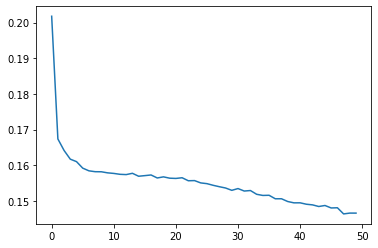

In [ ]:
plt.plot(model.history.history['mean_absolute_error'])

In [ ]:
print(x_train.shape)
print(y_train.shape)

(3168, 5)
(3168,)


Bangkok Data

In [ ]:
bangkok_data = pd.read_csv('bangkok_dengue/all - all.csv', index_col = 0)

In [1]:
bangkok_cases = bangkok_data["dengue_cases"]

NameError: ignored

In [ ]:
bangkok_weather = bangkok_data.drop(columns = ["dengue_cases"])

In [ ]:
bang_x_train, bang_x_test, bang_y_train, bang_y_test = train_test_split(bangkok_weather, bangkok_cases, test_size=.1, shuffle=False)

In [ ]:
bang_y_train2 = tf.expand_dims(bang_y_train, axis=1)
bang_y_train22 = np.array(bang_y_train2)
print(len(bang_y_train2))
print(bang_y_train22.shape)

In [ ]:
from keras.metrics import FalseNegatives
model3 = Sequential()

model3.add(LSTM(units = 1000, input_shape = (1,3), return_sequences=True))
model3.add(LSTM(units = 1))

model3.summary()
model3.compile(loss='MSE', optimizer='adam', metrics=['mean_absolute_error', 'mse'])

In [ ]:
bang_x_train_np = np.array(bang_x_train)
bang_xxxx = bang_x_train_np.reshape((162,1,3))
for i in range(3):
  #normalize input data
  bang_xxxx[:,:,i] -= bang_xxxx[:,:,i].min()
  bang_xxxx[:,:,i] /= bang_xxxx[:,:,i].max()

bang_yyyy = bang_y_train22.reshape((162))
bang_ymax = bang_yyyy.max()
bang_yyyy = bang_yyyy.astype(float)
bang_yyyy /= bang_ymax
bang_yyyy = np.sqrt(bang_yyyy)
model3.fit(bang_xxxx, bang_yyyy, epochs=50, batch_size=64)